In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [3]:
np.random.seed(42)

In [9]:
apartments = [f"Apt_{i}" for i in range(1,21)]

In [12]:
dates=pd.date_range(start="2025-07-01",periods=31,freq="D")

In [18]:
data = {
    "Date": np.tile(dates, len(apartments)),
    "Apartment": np.repeat(apartments, len(dates)),
    "Electricity_usage": np.random.normal(loc=20, scale=5, size=len(dates) * len(apartments))
}

In [21]:
df=pd.DataFrame(data)

In [23]:
df["Electricity_usage"]=df["Electricity_usage"].round(2)

In [24]:
print(df.isnull().sum())

Date                 0
Apartment            0
Electricity_usage    0
dtype: int64


In [25]:
print(df.describe())

                      Date  Electricity_usage
count                  620         620.000000
mean   2025-07-16 00:00:00          19.982419
min    2025-07-01 00:00:00           3.790000
25%    2025-07-08 00:00:00          16.530000
50%    2025-07-16 00:00:00          20.100000
75%    2025-07-24 00:00:00          23.142500
max    2025-07-31 00:00:00          39.260000
std                    NaN           4.882005


In [27]:
print(df.dtypes)

Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object


In [29]:
usage_per_apartment=df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)
#print(usage_per_apartment)

In [32]:
daily_avg=df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg.head())

Date
2025-07-01    20.9395
2025-07-02    21.1345
2025-07-03    20.1435
2025-07-04    20.9875
2025-07-05    19.6300
Name: Electricity_usage, dtype: float64


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

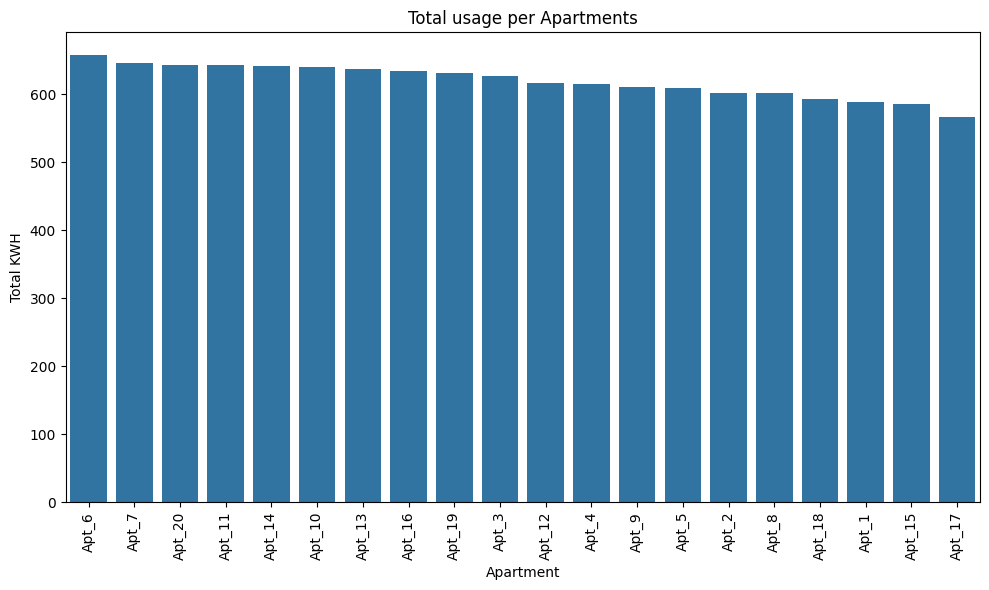

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartment.index, y=usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Apartment")
plt.ylabel("Total KWH")
plt.tight_layout()
plt.show()

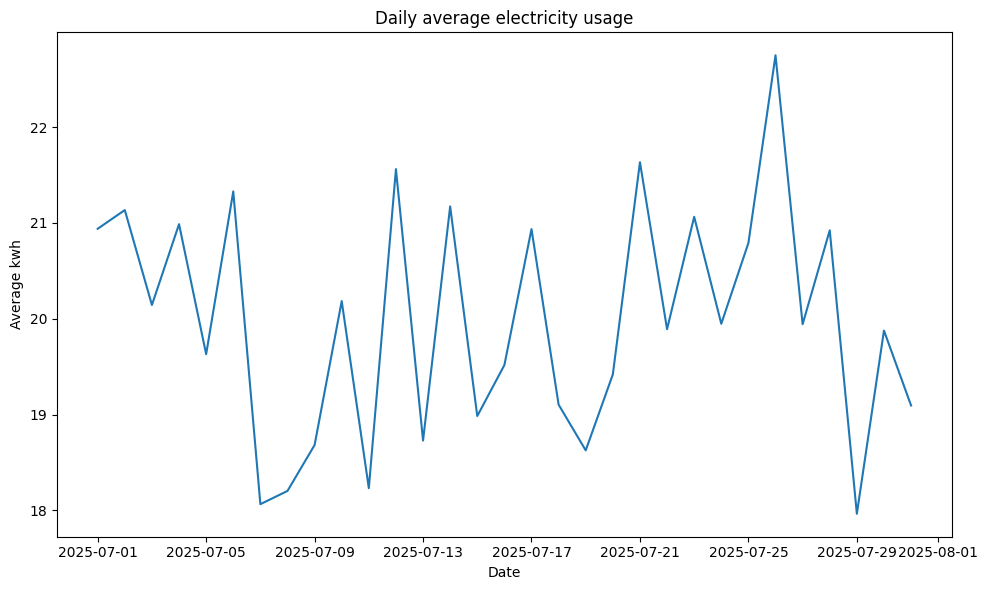

In [38]:
#time series plot of daily average
plt.figure(figsize=(10,6))
sns. lineplot(x=daily_avg.index, y=daily_avg.values)
plt.title("Daily average electricity usage")
plt.xlabel("Date")
plt.ylabel("Average kwh")
plt.tight_layout()
plt.show()

In [42]:
thresholds=df["Electricity_usage"].mean()+2 *df["Electricity_usage"].std()
df["High_Usage_flag"]=df["Electricity_usage"] > thresholds
print(df[df["High_Usage_flag"]== True].head())

          Date Apartment  Electricity_usage  High_Usage_flag
113 2025-07-21     Apt_4              32.32             True
125 2025-07-02     Apt_5              30.95             True
179 2025-07-25     Apt_6              33.60             True
209 2025-07-24     Apt_7              39.26             True
220 2025-07-04     Apt_8              31.57             True
